**Итоговая аттестация**



# Подготовка для работы с данными

##Загрузка библиотек

In [ ]:
# Загрузим библиотеки, которые понадобятся для выполнения работы
import numpy as np #для анализа многомерных данных сложными математическими операциями
import pandas as pd #для обработки табличных данных
import matplotlib.pyplot as plt #для визуализации и построения графиков
from matplotlib.pylab import rc, plot
import seaborn as sns #для построения красивых графиков
import plotly.express as px #для отрисовки графиков
import os #работа с операционной сисиемой

In [ ]:
from sklearn.linear_model import LogisticRegression #модель логистической регрессии

from sklearn.neighbors import KNeighborsClassifier #для использования метода к ближайших соседей

from sklearn.svm import SVC #для использования метода svm

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (RandomForestClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier)
                                                #для использования алгоритмов бэггинга и бустинга
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, r2_score, precision_score,
                             recall_score, roc_auc_score, roc_curve,
                             confusion_matrix, f1_score) #метрики качества
from sklearn.model_selection import cross_val_score #для оценки модели
from sklearn.model_selection import GridSearchCV #для подбора гиперпараметра
from sklearn.model_selection import train_test_split #для разделения данных на тренировочную и тестовую группы
from sklearn.model_selection import KFold #для кросс-валидации
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder #стандартизация данных
from sklearn.compose import ColumnTransformer #извлечение названий столбцов
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay #графики метрик качества
import tqdm #для контроля за процессом работы алгоритма
import pickle # сохранение модели

In [ ]:
!python --version

Python 3.10.12


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

## Загрузка датасета



https://www.kaggle.com/datasets/antimoni/metabolic-syndrome/data

Этот набор данных содержит информацию о людях с метаболическим синдромом. Метаболический синдром — состояние, предрасполагающее к эндокринным заболеваниям. Без лечения у людей с таким диагнозом в будущем часто развиваются сахарный диабет, а также сердечно-сосудистые патологии и различные нарушения во внутренних органах. Данные включают демографические, клинические и лабораторные измерения, а также наличие или отсутствие метаболического синдрома.

In [ ]:
df = pd.read_csv('/content/metabolic_syndrome.csv') # датасет
df.head() #посмотрим первые строчки обучающего датасета

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


###Описание датасета:
seqn: Порядковый идентификационный номер.

Age (возраст): Возраст человека.

Sex (пол): Пол человека (например, мужской, женский).

Мarital (cемейное положение): Семейное положение человека (в браке, в разводе, одинокие, овдовевшие, сепарировавшиеся).

Income (доход): уровень дохода или информация, связанная с доходом.

Race (раса): Этническое или расовое происхождение человека.

WaistCirc: Измерение окружности талии.

BMI (ИМТ): индекс массы тела, показатель состава тела.

Albuminuria (Альбуминурия): измерение, связанное с содержанием альбумина в моче.

UrAlbCr: Соотношение альбумина и креатинина в моче.

UricAcid	(Уровая кислота): уровень мочевой кислоты в крови.

BloodGlucose (Уровень глюкозы в крови): уровень глюкозы в крови, индикатор риска развития диабета.

HDL (ЛПВП): уровень холестерина липопротеинов высокой плотности («хороший» холестерин).

Triglycerides (триглицериды): уровень триглицеридов в крови.

MetabolicSyndrome (метаболический синдром): бинарная переменная, указывающая на наличие (1) или отсутствие (0) метаболического синдрома.

## Исследование данных

In [ ]:
#определяем, сколько места занимает датафрейм в оперативной памяти
print(f"Датасет занимает {df.memory_usage(index=True).sum()} байт")

Датасет занимает 288248 байт


Памяти должно хватить на обработку датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
# Приводим названия всех столбцов к виду: английские строчные без пробелов
df.columns = df.columns.str.lower().str.replace(" ","_")
df

,seqn,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [ ]:
#определяем количество строк и столбцов
print(f"В датасете: {df.shape[0]} строк")
print(f"В датасете {df.shape[1]} столбцов, из них:")
print(df.dtypes.value_counts())

В датасете: 2401 строк
В датасете 15 столбцов, из них:
int64      7
float64    5
object     3
dtype: int64


Датасет содержит числовые и категориальные переменные

In [ ]:
#для каждой числовой переменной подсчитаем количетство непропущенных значений, среднее значение, стандартное отклонение, минимальное значение, квантиль 25, 50 и 75, максимальное значение
# Выводим статистику
df.describe()

,seqn,age,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [ ]:
#выведем статистику для категориальных переменных
df.describe(include='object')

,sex,marital,race
count,2401,2193,2401
unique,2,5,6
top,Female,Married,White
freq,1211,1192,933


## Подготовим датасет к построению модели ML


### Анализ и обработка пропусков

In [ ]:
#установим наличие пропусков
print(df.isnull().sum())

seqn                   0
age                    0
sex                    0
marital              208
income               117
race                   0
waistcirc             85
bmi                   26
albuminuria            0
uralbcr                0
uricacid               0
bloodglucose           0
hdl                    0
triglycerides          0
metabolicsyndrome      0
dtype: int64


Датасет содержит много пропусков в признаках "семейное положение", "доход", "oбхват талии", "индекс массы тела"


In [ ]:
# заменим пропущенные значения в признаке "семейное положение" наиболее часто встречающимися
mode_marital = df['marital'].mode()[0]  # Вычисление моды (наиболее часто встречающегося значения)
df['marital'].fillna(mode_marital, inplace=True)


In [ ]:
#выводим статистику: количество уникальных значений по признаку семейное положение
df['marital'].value_counts()

Married      1400
Single        498
Divorced      242
Widowed       166
Separated      95
Name: marital, dtype: int64

In [ ]:
#заполним пропуски в столбце "доход" средним значением
df['income'].fillna(df['income'].mean(), inplace = True)

In [ ]:
#заполним пропуски в столбце "объем талии", "индекс массы тела" медианой
df['waistcirc'].fillna(df['waistcirc'].median(), inplace = True)
df['bmi'].fillna(df['bmi'].median(), inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   age                2401 non-null   int64  
 2   sex                2401 non-null   object 
 3   marital            2401 non-null   object 
 4   income             2401 non-null   float64
 5   race               2401 non-null   object 
 6   waistcirc          2401 non-null   float64
 7   bmi                2401 non-null   float64
 8   albuminuria        2401 non-null   int64  
 9   uralbcr            2401 non-null   float64
 10  uricacid           2401 non-null   float64
 11  bloodglucose       2401 non-null   int64  
 12  hdl                2401 non-null   int64  
 13  triglycerides      2401 non-null   int64  
 14  metabolicsyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


### Анализ и обработка выбросов

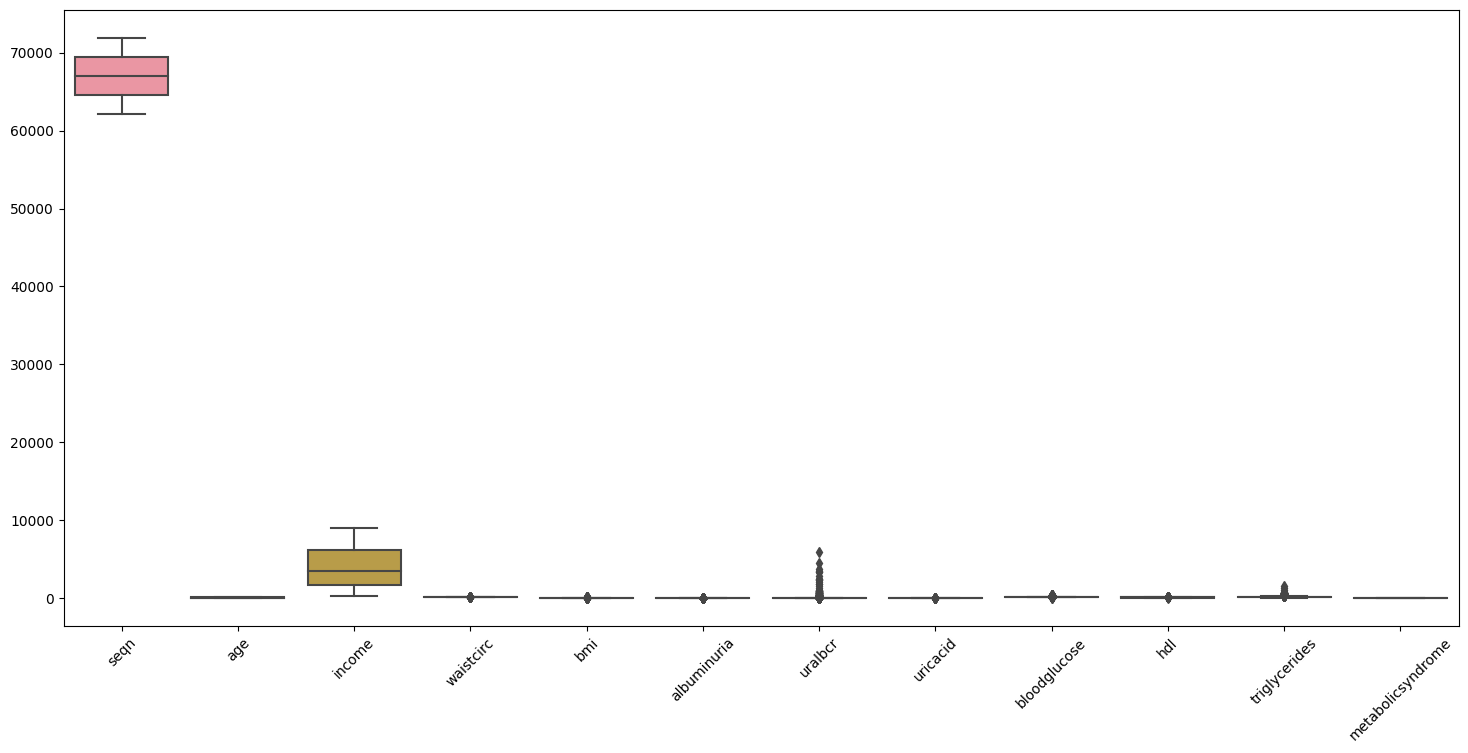

In [ ]:
#устанивим наличие выбросов
plt.figure(figsize=(18, 8))
sns.boxplot(df) # используем коробку с уcами
plt.xticks(rotation=45)
plt.show()

Датасет содержит выбросы а показателх "триглицериды" и "соотношение альбумина и креатинина в моче". Поскольку это медицинские показатели, не будем считать их выбрасами.

### Анализ распределения

array([[<Axes: title={'center': 'metabolicsyndrome'}>]], dtype=object)

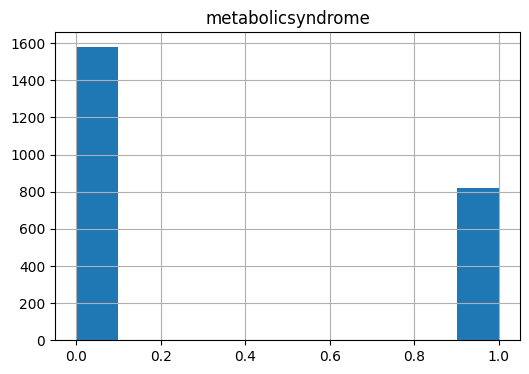

In [ ]:
df.hist(['metabolicsyndrome'], figsize=(6,4))

In [ ]:
# считаем долю лиц, у которых случился сердечный приступ
df["metabolicsyndrome"].value_counts(normalize=True)

0    0.657643
1    0.342357
Name: metabolicsyndrome, dtype: float64

Целевая переменная распределена не равномерно



array([[<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'albuminuria'}>,
        <Axes: title={'center': 'bloodglucose'}>],
       [<Axes: title={'center': 'waistcirc'}>,
        <Axes: title={'center': 'hdl'}>,
        <Axes: title={'center': 'uralbcr'}>],
       [<Axes: title={'center': 'uricacid'}>,
        <Axes: title={'center': 'triglycerides'}>, <Axes: >]],
      dtype=object)

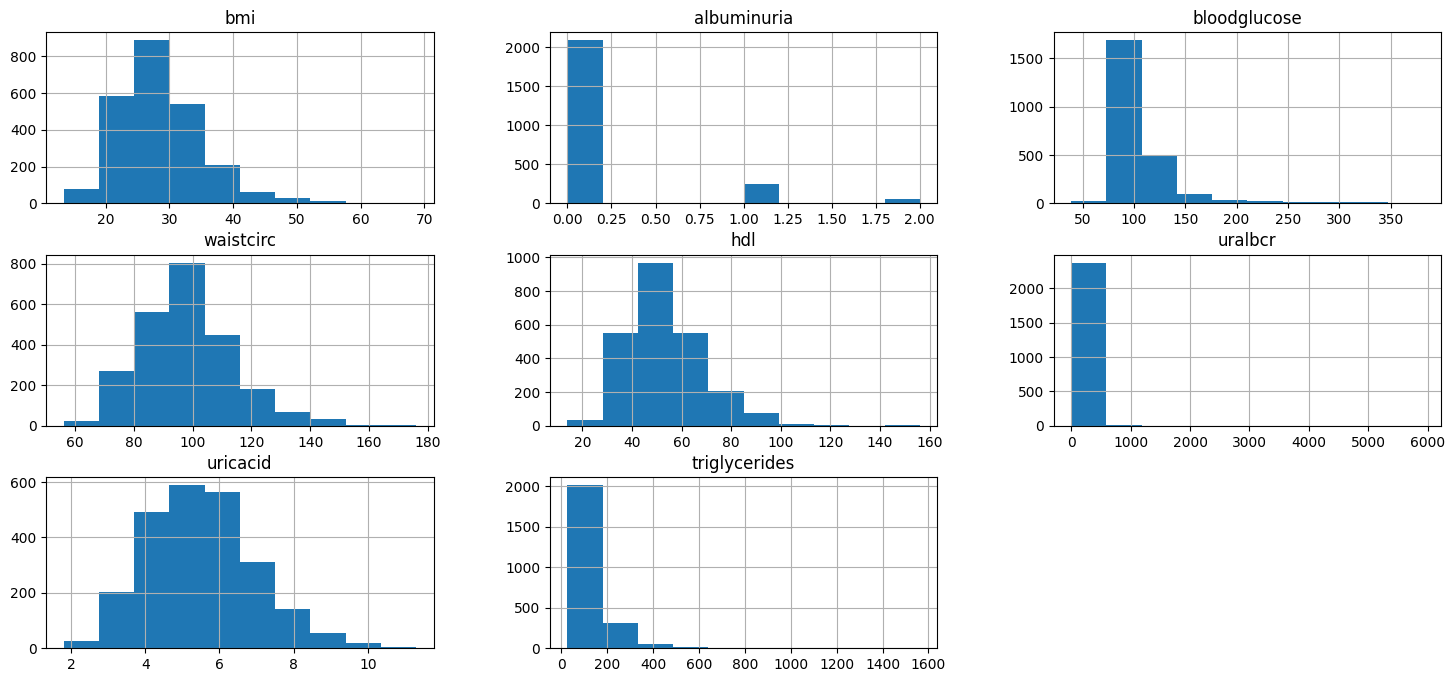

In [ ]:
df.hist(['bmi', 'albuminuria', 'bloodglucose',	'waistcirc', 'hdl', 'uralbcr', 'uricacid', 'triglycerides'], figsize=(18, 8))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

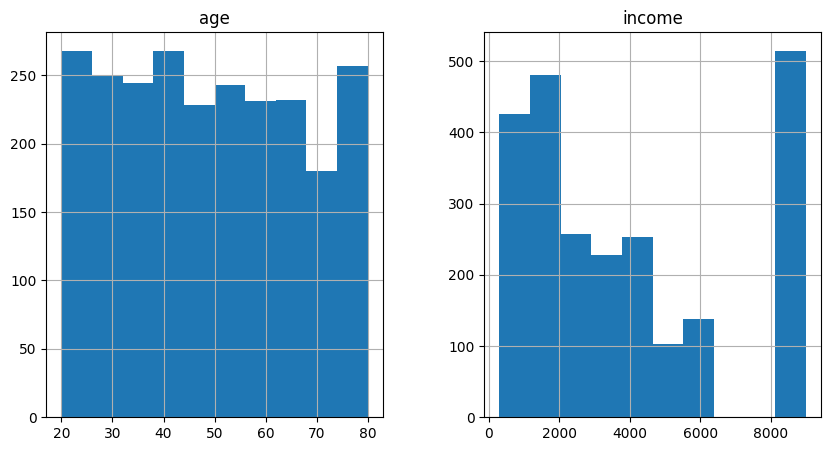

In [ ]:
df.hist(['age',	'income'], figsize=(10, 5))

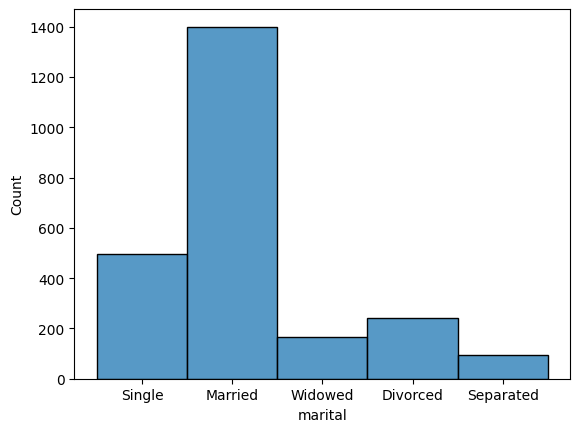

In [ ]:
sns.histplot(df['marital'])
plt.show()

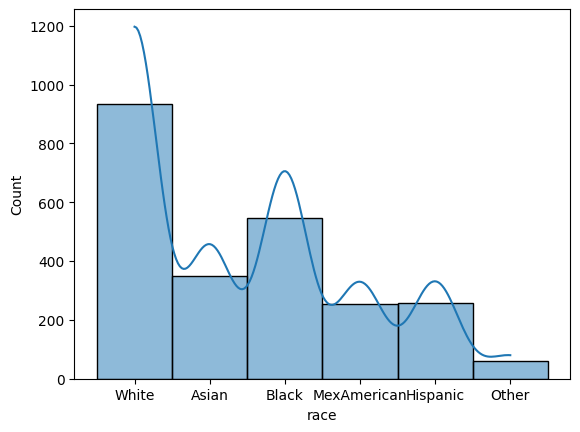

In [ ]:
sns.histplot(df['race'], kde=True)
plt.show()

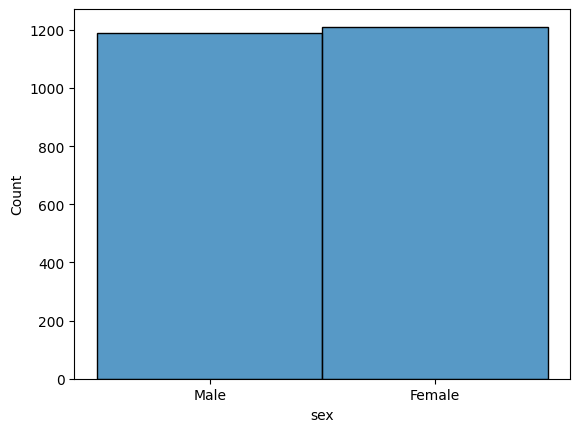

In [ ]:
sns.histplot(df['sex'])
plt.show()

Вывод :
- Датасет небольшой, содержит 2401 объекта и 14 признаков
- Пропуски заменили,  выбросы посчитали нормой для датасета о здоровье
- Категориальные переменные представлены как принадлежности к классам
- Целевая переменная "metabolicsyndrome" распределена наравномерно, что нужно учитывать при построении и оценке качества модели
- Числовые признаки распределены равномерно
- Категориальные переменные "Раса" и "Семейное положение" распределены не равномерно.


### Анализ корреляции

<ipython-input-37-6cde1a6c4570>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


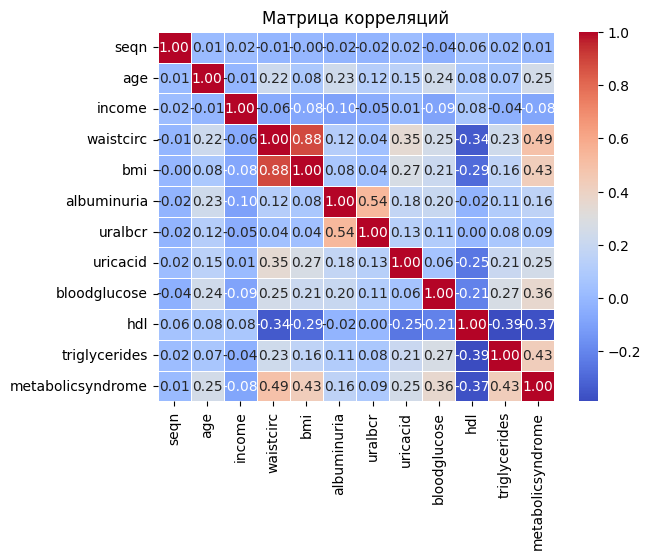

In [ ]:
#Построим матрицу корреляций
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Матрица корреляций")
plt.show()

Судя по тепловой карте, наибольшая зависимость установлена между индексом массы тела и объемом талии (88 %), альбуминурией и соотношением альбумина и креатина в моче (более 50%). Остальные признаки между собой коррелируют слабо

Определим зависимости по выборочно по некоторым параметрам

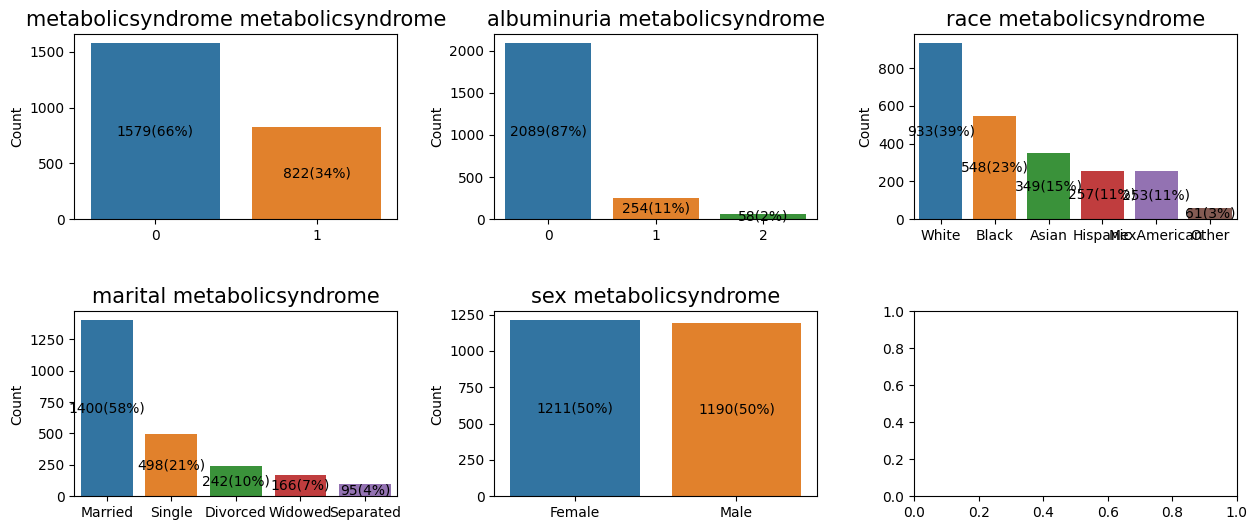

In [ ]:
fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

features = ["metabolicsyndrome", "albuminuria", 'race', 'marital', 'sex']

row, col, num_cols = 0,0,3

for u in features:
    sns.barplot(x = df[u].value_counts().index, y = df[u].value_counts(),
                ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " metabolicsyndrome", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)

for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y,
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(
                               patch.get_height()/len(df.metabolicsyndrome))+')',
                            horizontalalignment='center', verticalalignment='center')

#Построим модели классификации

## Разделим данные на тренировочную и тестовую выборки

In [ ]:
#выделим признаки и целевую переменную, исключим признаки, которые не актуальны для нашего исследования
X = df.drop(['seqn', 'metabolicsyndrome'], axis=1)

y = df['metabolicsyndrome']

In [ ]:
X.head()

,age,sex,marital,income,race,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides
0,22,Male,Single,8200.00000,White,81.0,23.3,0,3.88,4.9,92,41,84
1,44,Female,Married,4500.00000,White,80.1,23.2,0,8.55,4.5,82,28,56
2,21,Male,Single,800.00000,Asian,69.6,20.1,0,5.07,5.4,107,43,78
3,43,Female,Single,2000.00000,Black,120.4,33.3,0,5.22,5.0,104,73,141
4,51,Male,Married,4005.25394,Asian,81.1,20.1,0,8.13,5.0,95,43,126


In [ ]:
#разделим датасет на тренировочную и тестовую выборки
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42,
                                                     stratify=y) # Для равномерного представления 0 и 1 в тренировочной и тестовой выборках

X_train.shape, X_test.shape

((1800, 13), (601, 13))

###Переведем категориальные переменные в числовые бинарные, стандартизируем данные

In [ ]:
categorical = ['sex', 'race', 'marital']
numeric_features = [col for col in X_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,sex_Female,sex_Male,race_Asian,race_Black,race_Hispanic,race_MexAmerican,race_Other,race_White,marital_Divorced,marital_Married,...,age,income,waistcirc,bmi,albuminuria,uralbcr,uricacid,bloodglucose,hdl,triglycerides
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.766667,0.482759,0.331386,0.197107,0.0,0.004519,0.265957,0.174927,0.427419,0.057292
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.616667,0.252874,0.511686,0.379747,0.5,0.008143,0.542553,0.221574,0.145161,0.079427
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.116667,0.149425,0.358932,0.280289,0.0,0.000706,0.468085,0.131195,0.233871,0.035807
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.833333,0.137931,0.577629,0.491863,0.0,0.001275,0.308511,0.306122,0.250000,0.079427
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.683333,0.080460,0.494992,0.365280,0.5,0.007273,0.361702,0.338192,0.185484,0.081380


In [ ]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex_Female         1800 non-null   float64
 1   sex_Male           1800 non-null   float64
 2   race_Asian         1800 non-null   float64
 3   race_Black         1800 non-null   float64
 4   race_Hispanic      1800 non-null   float64
 5   race_MexAmerican   1800 non-null   float64
 6   race_Other         1800 non-null   float64
 7   race_White         1800 non-null   float64
 8   marital_Divorced   1800 non-null   float64
 9   marital_Married    1800 non-null   float64
 10  marital_Separated  1800 non-null   float64
 11  marital_Single     1800 non-null   float64
 12  marital_Widowed    1800 non-null   float64
 13  age                1800 non-null   float64
 14  income             1800 non-null   float64
 15  waistcirc          1800 non-null   float64
 16  bmi                1800 

In [ ]:
# Функция для построения графиков решающих областей
def plot_decision_boundary(model, X, y):
    # Параметры для графика
    h = .02  # Шаг сетки
    cmap = plt.cm.RdYlBu
    markers = 's^o'  # Маркеры для классов

    # Обучение модели
    model.fit(X, y)

    # Размеры графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказание значений на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контуров
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Разметка классов
    for i, c in zip(range(2), markers):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions ({type(model).__name__})')
    plt.legend()
    plt.show()

In [ ]:
# Функция для расчета метрик и построения кривой ROC
def calculate_metrics_and_plot_roc(model, X_train_transformed, y_train, X_test_transformed, y_test):
    # Обучение модели
    model.fit(X_train_transformed, y_train)

    # Предсказание на обучающей и тестовой выборке
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # Расчет метрик precision,  recall и accuracy
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f'Training Accuracy: {train_accuracy}')
    print(f"Test Precision: {test_precision:.2f}")
    print(f"Test Recall: {test_recall:.2f}")
    print(f'Test Accuracy: {test_accuracy}')

    metrics =  {'params': ['Training_Precision', 'Test_Precision', 'Training_Recall', 'Test_Recall', 'Training_Accuracy', 'Test_Accuracy'],
                'values': [train_precision, test_precision, train_recall, test_recall, train_accuracy, test_accuracy]}

    # Расчет ROC-AUC на тестовой выборке
    try:
      pred_test = model.predict_proba(X_test_transformed)
      pred_train = model.predict_proba(X_train_transformed)
      roc_auc_test = roc_auc_score(y_test, pred_test[:, 1])
      roc_auc_train = roc_auc_score(y_train, pred_train[:, 1])
      print(f"ROC-AUC_test = : {roc_auc_test:.2f} и ROC-AUC_train = : {roc_auc_train:.2f}")

      # Построение кривой ROC
      fpr_test, tpr_test, _ = roc_curve(y_test, pred_test[:, 1])
      fpr_train, tpr_train, _ = roc_curve(y_train, pred_train[:, 1])
      plt.figure()
      plt.plot(fpr_test, tpr_test, color='blue', lw=2, label = 'ROC Curve test')
      plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label = 'ROC Curve train')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.title(f'ROC Curve ({type(model).__name__})')
      plt.show()
    except Exception as e:
      print(e)
    return metrics


In [ ]:
#функция постоения матрицы ошибок
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)


## Алгоритм SVM

In [ ]:
# Тренировка модели
model_svm = SVC(kernel='linear',
            class_weight='balanced', #для балансировки весов в несбалансированной целевой переменной
            probability=True)
model_svm.fit(X_train_transformed, y_train)


SVC(class_weight='balanced', kernel='linear', probability=True)

In [ ]:
# Предсказания на тренировочной выборке
train_pred_svm = model_svm.predict(X_train_transformed)
train_pred_svm[:20]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
# предсказания на тестовой выборке
test_pred_svm = model_svm.predict(X_test_transformed)
test_pred_svm[:20]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

Confusion matrix, without normalization
[[325  70]
 [ 45 161]]


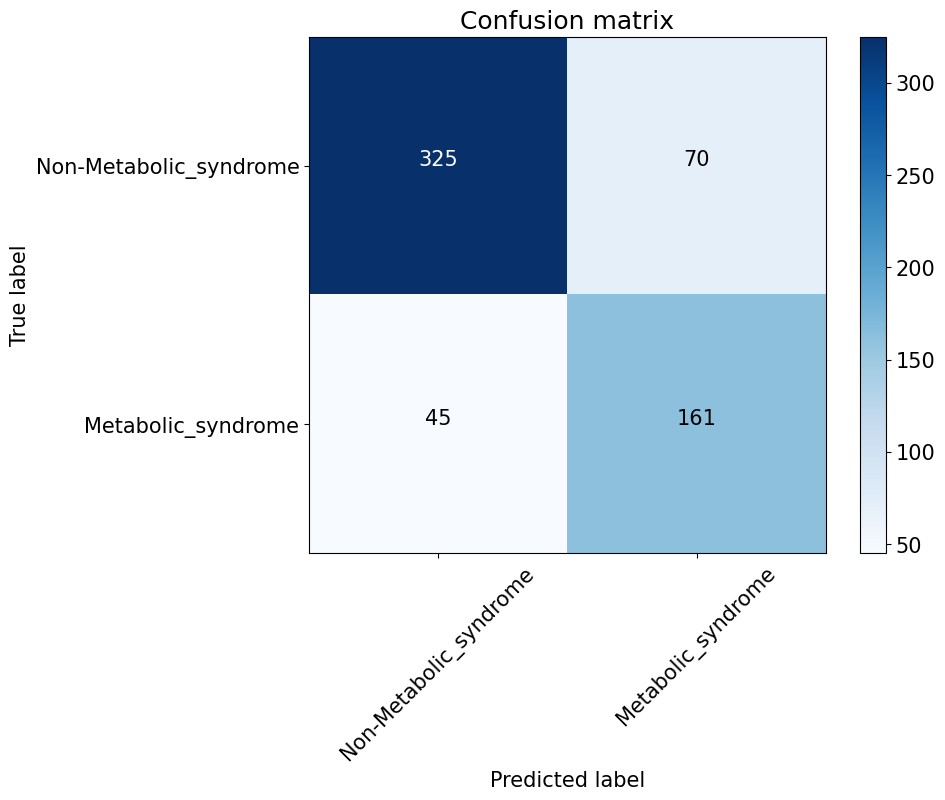

In [ ]:

cnf_matrix = confusion_matrix(y_test, test_pred_svm)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()


Training Precision: 0.70
Training Recall: 0.83
Training Accuracy: 0.8183333333333334
Test Precision: 0.70
Test Recall: 0.78
Test Accuracy: 0.8086522462562395
ROC-AUC_test = : 0.89 и ROC-AUC_train = : 0.91


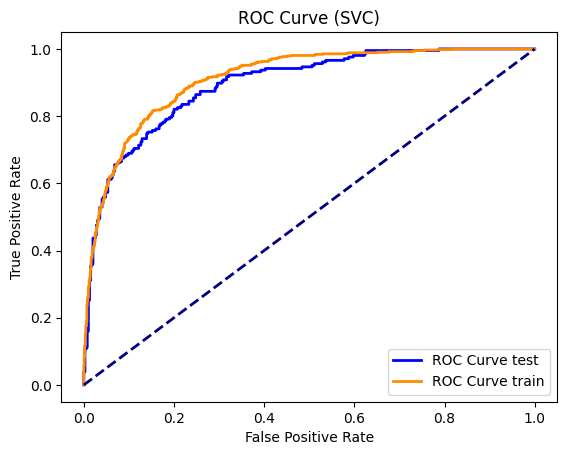

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_svm = calculate_metrics_and_plot_roc(model_svm, X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
svm = sklearn.metrics.classification_report(y_test, test_pred_svm)
print(svm)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       395
           1       0.70      0.78      0.74       206

    accuracy                           0.81       601
   macro avg       0.79      0.80      0.79       601
weighted avg       0.82      0.81      0.81       601



In [ ]:
importances = pd.DataFrame({'weights': model_svm.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
21,-4.728341,hdl
1,-0.381344,sex_Male
14,-0.294509,income
12,-0.286693,marital_Widowed
6,-0.236770,race_Other
3,-0.178966,race_Black
8,-0.050670,marital_Divorced
7,-0.041657,race_White
5,0.032161,race_MexAmerican
10,0.056129,marital_Separated


Ниабольший вес имеют уровень триглицеридов, объем талии, уровень сахара в крови, "хороший" холестерин, возраст, ИМТ

**Вывод** Модель показывает хорошиее качество на тренировочных и тестовых данных. Однко матрица ошибок, а именно показатель ложно-отрицательных предсказаний (45 человек) кажется высоким.

### Сохраним модель SVM

In [ ]:
with open('model_svm.pickle', 'wb') as f:
    pickle.dump(model_svm, f)

# Загружаем модель из файла при необходимости:
#with open('model_svm', 'rb') as f:
    #model_svm = pickle.load(f)

## Алгоритм логистической регрессии

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train_transformed, y_train)


LogisticRegression()

In [ ]:
train_pred_LR = model_LR.predict(X_train_transformed)
train_pred_LR[:20]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
test_pred_LR = model_LR.predict(X_test_transformed)
test_pred_LR[:20]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

Confusion matrix, without normalization
[[367  28]
 [ 78 128]]


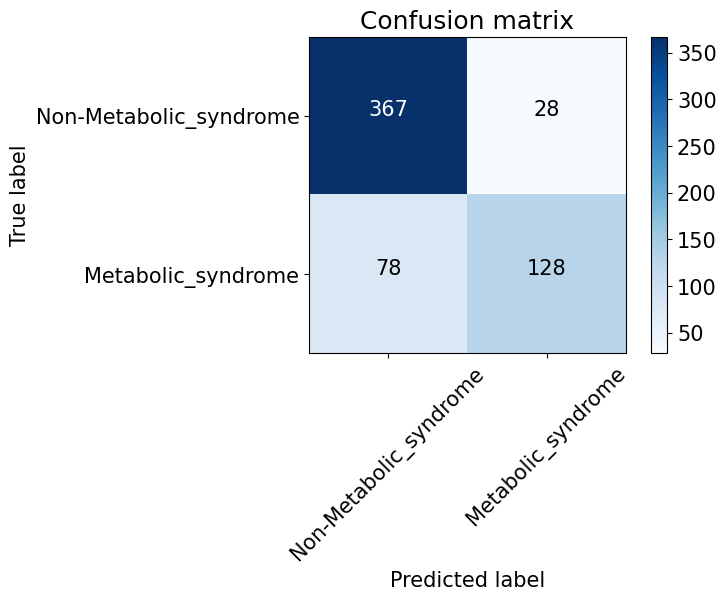

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_pred_LR)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Определим вероятности спрогнозированных классов

In [ ]:
pred_LR = model_LR.predict_proba(X_test_transformed)[:,1]

In [ ]:
classes = pred_LR > 0.5
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[367,  28],
        [ 78, 128]]),
 0.6213592233009708)

In [ ]:
classes = pred_LR > 0.05
confusion_matrix(y_test, classes), recall_score(y_test, classes)

(array([[ 85, 310],
        [  0, 206]]),
 1.0)

Training Precision: 0.81
Training Recall: 0.67
Training Accuracy: 0.835
Test Precision: 0.82
Test Recall: 0.62
Test Accuracy: 0.8236272878535774
ROC-AUC_test = : 0.89 и ROC-AUC_train = : 0.91


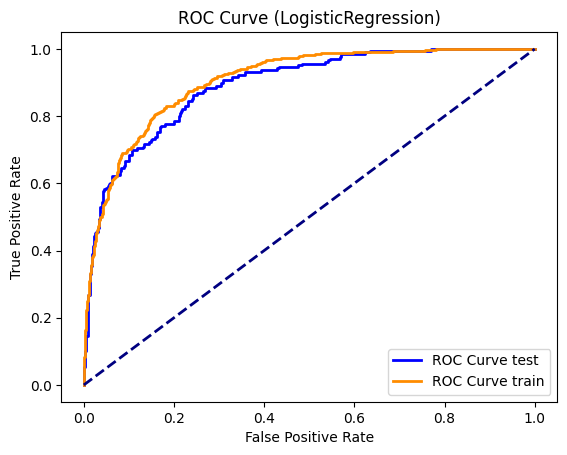

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_lr = calculate_metrics_and_plot_roc(model_LR, X_train_transformed, y_train, X_test_transformed, y_test)

Определим веса признаков

In [ ]:
importances = pd.DataFrame({'weights': model_LR.coef_[0], 'features': X_train_transformed.columns}).sort_values(by='weights')
importances

,weights,features
21,-5.444467,hdl
1,-0.406755,sex_Male
6,-0.292002,race_Other
12,-0.286399,marital_Widowed
14,-0.268937,income
3,-0.205250,race_Black
8,-0.015986,marital_Divorced
7,-0.012683,race_White
10,0.052137,marital_Separated
9,0.073945,marital_Married


Самый большой вес имеют признаки: уровень триглицеридов, "хороший" холестерин, объем талии, сахар в крови, ИМТ, возраст, уровень мочевой кислоты.

In [ ]:
LR = sklearn.metrics.classification_report(y_test, test_pred_LR)
print(LR)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       395
           1       0.82      0.62      0.71       206

    accuracy                           0.82       601
   macro avg       0.82      0.78      0.79       601
weighted avg       0.82      0.82      0.82       601



**Вывод** Метрики качества показывает хорошее обучение. Качество сравнимо с моделью SVM. При этом по матрице ошибок модель SVM показывает более предпочтительные метрики.

### Сохраним модель логистической регрессии

In [ ]:
with open('model_LR.pickle', 'wb') as f:
    pickle.dump(model_LR, f)

# Загружаем модель из файла при необходимости:
#with open('model_LR.pickle', 'rb') as f:
    #model_LR = pickle.load(f)

## Алгоритм решающего дерева

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42, class_weight = "balanced")

In [ ]:
# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [4, 6, 8, 10, 20, 30],    #выбираем параметры: максимальная глубина
    'min_samples_split': [3, 4, 5, 10, 20],  #минимальный размер узла
    'min_samples_leaf': [2, 3, 4, 6, 8, 10], #минимальный размер листа
    'ccp_alpha': [0.01, 0.1, 1, 10]} # метод, альфа который штрафует модель за ошибки

grid_search_tree = GridSearchCV(model_tree, param_grid, cv=15,
                           n_jobs=-1) # сv ограничивает количество обращений
grid_search_tree.fit(X_train_transformed, y_train)
#получаем лучшие результаты
best_params = grid_search_tree.best_params_
best_regressor = grid_search_tree.best_estimator_

In [ ]:
print(best_params)
print(best_regressor)

{'ccp_alpha': 0.01, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}
DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=6,
                       min_samples_leaf=2, min_samples_split=3,
                       random_state=42)


In [ ]:
train_pred_tree = grid_search_tree.predict(X_train_transformed)
train_pred_tree[:20]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
test_pred_tree = grid_search_tree.predict(X_test_transformed)
np.array(test_pred_tree[:20] )

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

Training Precision: 1.00
Training Recall: 1.00
Training Accuracy: 1.0
Test Precision: 0.84
Test Recall: 0.78
Test Accuracy: 0.8735440931780366
ROC-AUC_test = : 0.85 и ROC-AUC_train = : 1.00


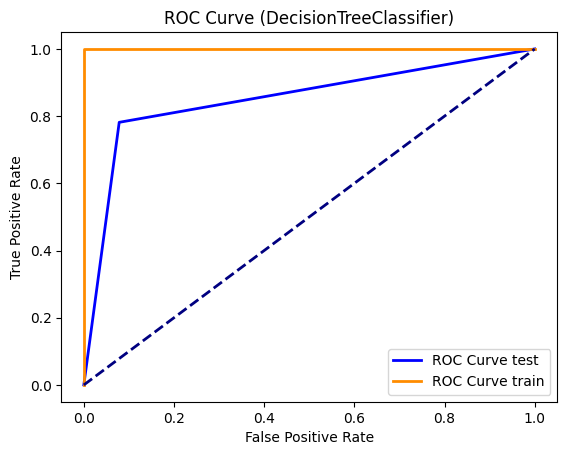

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_tree = calculate_metrics_and_plot_roc(model_tree, X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
TREE = sklearn.metrics.classification_report(y_test, test_pred_tree)
print(TREE)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       395
           1       0.71      0.87      0.78       206

    accuracy                           0.83       601
   macro avg       0.81      0.84      0.82       601
weighted avg       0.85      0.83      0.84       601



Confusion matrix, without normalization
[[321  74]
 [ 27 179]]


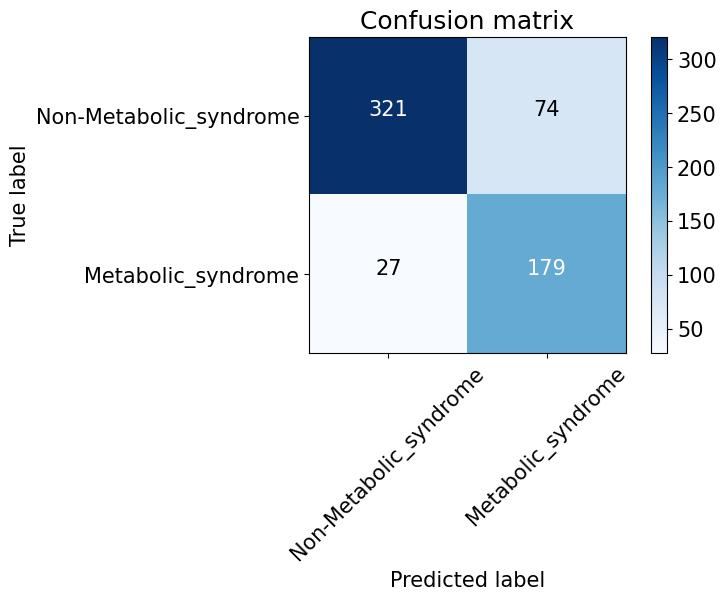

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_pred_tree)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

**Вывод** Модель с точки зрения метрик качества считаем переобученной, поскольку на тренировочной выборке все метрики равны 1. Матрица ошибок свидетельствует также о хороших показателях, поскольку относит к здоровым людям 27 пациента, в действительности имеющих заболевание.

In [ ]:
### Сохраним модель решающего дерева
with open('model_tree.pickle', 'wb') as f:
    pickle.dump(model_tree, f)

# Загружаем модель из файла при необходимости:
#with open('model_tree.pickle', 'rb') as f:
    #model_tree = pickle.load(f)

## Алгоритм случайного леса


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

In [ ]:
# построим модель на признаках, установленных по умолчанию
model_rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight=dict(enumerate(class_weights)))


In [ ]:
model_rf.fit(X_train_transformed, y_train)


RandomForestClassifier(class_weight={0: 0.7602913236225459,
                                     1: 1.460462287104623},
                       n_estimators=50, random_state=42)

In [ ]:
# Сделаем прогноз на тренировочных данных
train_pred_rf = model_rf.predict(X_train_transformed)
np.array(train_pred_rf[:20])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
# Сделаем прогноз на новых данных
test_pred_rf = model_rf.predict(X_test_transformed)
np.array(test_pred_rf[:20])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

Training Precision: 1.00
Training Recall: 1.00
Training Accuracy: 1.0
Test Precision: 0.87
Test Recall: 0.76
Test Accuracy: 0.8785357737104825
ROC-AUC_test = : 0.96 и ROC-AUC_train = : 1.00


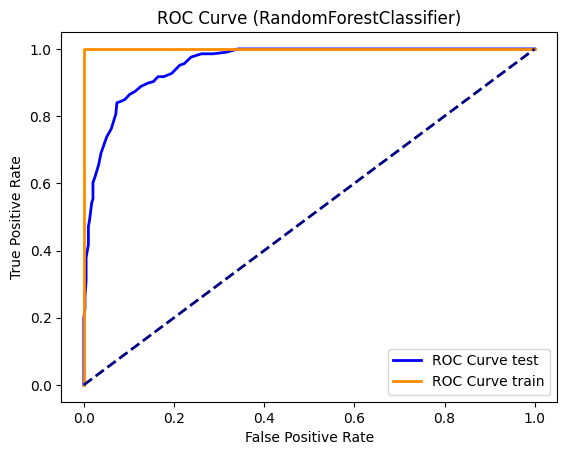

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_rf = calculate_metrics_and_plot_roc(model_rf, X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
rf = sklearn.metrics.classification_report(y_test, test_pred_rf)
print(rf)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       395
           1       0.87      0.76      0.81       206

    accuracy                           0.88       601
   macro avg       0.88      0.85      0.86       601
weighted avg       0.88      0.88      0.88       601



Confusion matrix, without normalization
[[371  24]
 [ 49 157]]


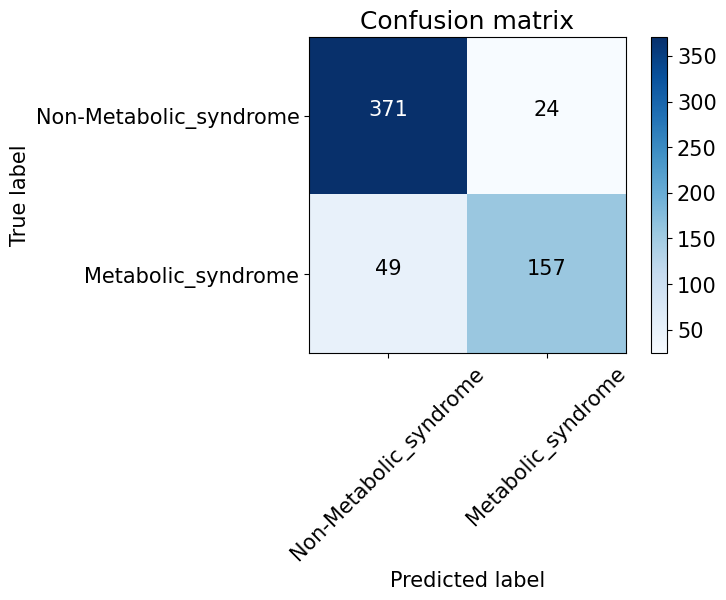

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_pred_rf)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

**Вывод** Модель можно считать переученной, поскольку на тренировочной выборке все метрики качества показывают 1. На тестовой выборке качество хуже. При этом показатели матрицы ошибок гораздо хуже, чем в модели решающего древа.

In [ ]:
feature_rf = pd.DataFrame({'Importance':model_rf.feature_importances_, 'Features': X_train_transformed.columns})
print(feature_rf)

    Importance           Features
0     0.014192         sex_Female
1     0.012862           sex_Male
2     0.005364         race_Asian
3     0.005305         race_Black
4     0.005399      race_Hispanic
5     0.003552   race_MexAmerican
6     0.002208         race_Other
7     0.006441         race_White
8     0.007165   marital_Divorced
9     0.005847    marital_Married
10    0.002190  marital_Separated
11    0.004470     marital_Single
12    0.003929    marital_Widowed
13    0.054717                age
14    0.029115             income
15    0.138789          waistcirc
16    0.110626                bmi
17    0.007648        albuminuria
18    0.052877            uralbcr
19    0.045610           uricacid
20    0.187415       bloodglucose
21    0.106751                hdl
22    0.187528      triglycerides


Веса признаков невысокие, однако больше других выделяются: уровень сахара в крови, триглицериды, объем талии, ИМТ, "хороший" холестерин

### Сохраним модель случайного леса

In [ ]:
with open('model_rf.pickle', 'wb') as f:
    pickle.dump(model_rf, f)

# Загружаем модель из файла при необходимости:
#with open('model_rf.pickle', 'rb') as f:
    #model_rf = pickle.load(f)

## Алгоритмы бэггинга


In [ ]:
# построим базовое дерево, без подбора гиперпараметров
tree = DecisionTreeClassifier(random_state=40, max_depth=2, class_weight = "balanced")
#Обучим базовое дерево
tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=40)

In [ ]:
#посмотрим метрики качества базового дерева
tree.score(X_train_transformed, y_train), tree.score(X_test_transformed, y_test)

(0.7366666666666667, 0.7454242928452579)

In [ ]:
#обучим модель классификации
model_bag = BaggingClassifier(estimator=tree, n_estimators=50,
                        random_state=40,
                        max_samples=0.3)

In [ ]:
model_bag.fit(X_train_transformed, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=2,
                                                   random_state=40),
                  max_samples=0.3, n_estimators=50, random_state=40)

In [ ]:
#определим метрики качества
model_bag.score(X_train_transformed, y_train)

0.8288888888888889

In [ ]:
# Сделаем прогноз на тренировочных данных
train_pred_bag = model_bag.predict(X_train_transformed)
np.array(train_pred_bag[:20])

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
# Сделаем прогноз на новых данных
test_pred_bag = model_bag.predict(X_test_transformed)
np.array(test_pred_bag[:20])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
bag = sklearn.metrics.classification_report(y_test, test_pred_bag)
print(bag)



              precision    recall  f1-score   support

           0       0.94      0.78      0.86       395
           1       0.69      0.91      0.78       206

    accuracy                           0.83       601
   macro avg       0.82      0.85      0.82       601
weighted avg       0.86      0.83      0.83       601



Training Precision: 0.69
Training Recall: 0.90
Training Accuracy: 0.8288888888888889
Test Precision: 0.69
Test Recall: 0.91
Test Accuracy: 0.826955074875208
ROC-AUC_test = : 0.93 и ROC-AUC_train = : 0.93


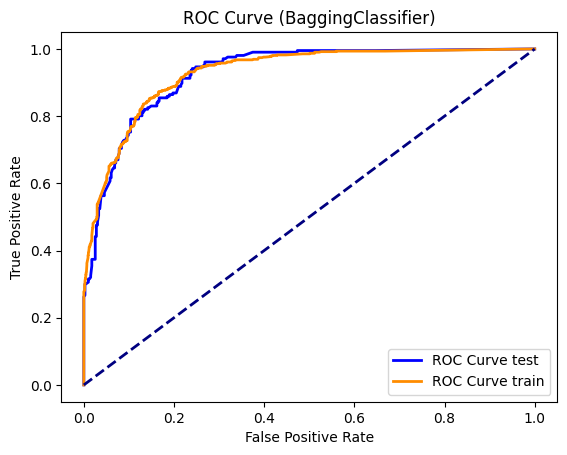

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_bag = calculate_metrics_and_plot_roc(model_bag, X_train_transformed, y_train, X_test_transformed, y_test)

Confusion matrix, without normalization
[[309  86]
 [ 18 188]]


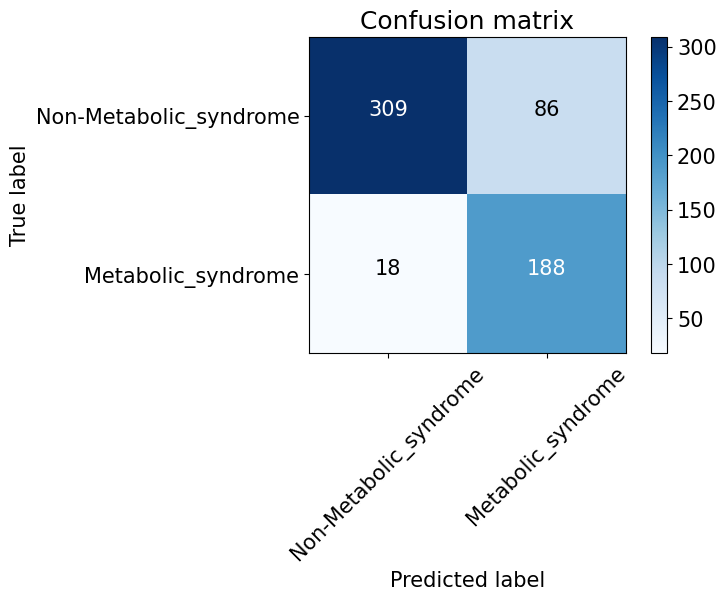

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_pred_bag)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

**Вывод** Показатели всех метрик на тренировочной выборке неплохие. Разница с результатами обучения на тестовой выборке небольшая. Показатели ROC-AUC высокие.  Считаем, что модель обучена ходошо.  При этом матрица ошибок демонстрирует низкий показатель ложно отрицательных предсказаний - 18 пациентов, находящихся в зоне риска предсказаны как не имеющие заболевания.

### Сохраним модель бегинга

In [ ]:
with open('model_bag.pickle', 'wb') as f:
    pickle.dump(model_bag, f)

# Загружаем модель из файла при необходимости:
#with open('model_bag.pickle', 'rb') as f:
    #model_bag = pickle.load(f)

## Алгоритм бустинга XGBBoost

In [ ]:
from math import sqrt
scale_pos_weight_sqrt = sqrt(len(df[df['metabolicsyndrome'] == 0])/len(df[df['metabolicsyndrome'] == 1]))


In [ ]:
model_XGB = XGBClassifier(estimator=tree, n_estimators=50,
                         random_state=40, scale_pos_weight = scale_pos_weight_sqrt)

In [ ]:
model_XGB.fit(X_train_transformed, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:13:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=DecisionTreeClassifier(class_weight='balanced',
                                               max_depth=2, random_state=40),
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Сделаем прогноз на тренировочных данных
train_pred_XGB = model_XGB.predict(X_train_transformed)
np.array(train_pred_XGB[:20])

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
# Сделаем прогноз на новых данных
test_pred_XGB = model_XGB.predict(X_test_transformed)
np.array(test_pred_XGB[:20])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

Confusion matrix, without normalization
[[365  30]
 [ 38 168]]


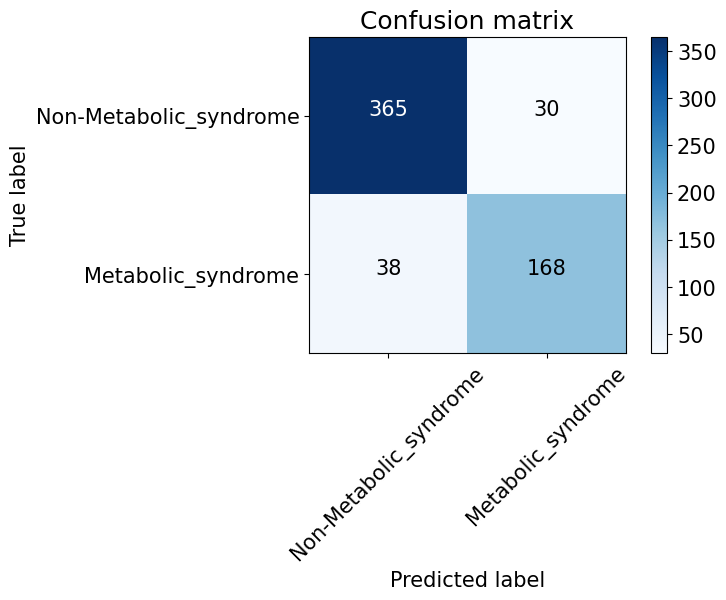

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_pred_XGB)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Non-Metabolic_syndrome', 'Metabolic_syndrome'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Матрица ошибок показывает опасную тенденцию, поскольку 38 человек, находящиеся в зоне риска, были отнесены к здоровым людям.

In [ ]:
XGB = sklearn.metrics.classification_report(y_test, test_pred_XGB)
print(XGB)


              precision    recall  f1-score   support

           0       0.91      0.92      0.91       395
           1       0.85      0.82      0.83       206

    accuracy                           0.89       601
   macro avg       0.88      0.87      0.87       601
weighted avg       0.89      0.89      0.89       601



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:13:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Training Precision: 1.00
Training Recall: 1.00
Training Accuracy: 1.0
Test Precision: 0.85
Test Recall: 0.82
Test Accuracy: 0.8868552412645591
ROC-AUC_test = : 0.96 и ROC-AUC_train = : 1.00


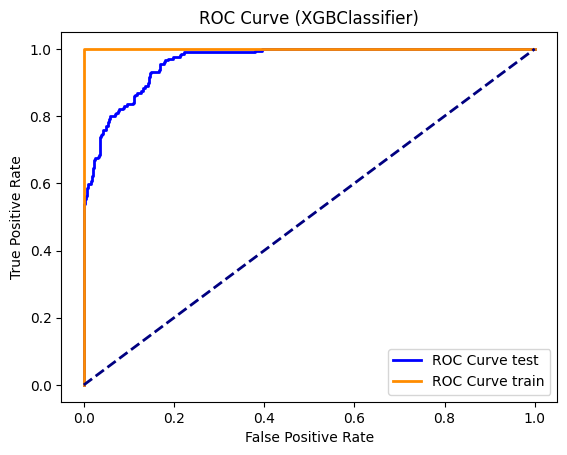

In [ ]:
#посчитаем метрики качества на тестовой и тренировочной выборках
metrics_xgb = calculate_metrics_and_plot_roc(model_XGB, X_train_transformed, y_train, X_test_transformed, y_test)

На тренировочной выборке все метрики равны 1, а на тестовой выборке значительно ниже. Считаем, что модель сильно переучена.

**Вывод** Модель переучена и имеет плохие показатели в матрице ошибок, поэтому считаем ее плохо обученной.

In [ ]:
feature_XGB = pd.DataFrame({'Importance':model_XGB.feature_importances_, 'Features': X_train_transformed.columns})
print(feature_XGB)

    Importance           Features
0     0.083406         sex_Female
1     0.000000           sex_Male
2     0.026429         race_Asian
3     0.020279         race_Black
4     0.021435      race_Hispanic
5     0.000000   race_MexAmerican
6     0.000000         race_Other
7     0.020292         race_White
8     0.039465   marital_Divorced
9     0.023302    marital_Married
10    0.000000  marital_Separated
11    0.034949     marital_Single
12    0.020825    marital_Widowed
13    0.044326                age
14    0.024891             income
15    0.114208          waistcirc
16    0.036382                bmi
17    0.030851        albuminuria
18    0.029681            uralbcr
19    0.026996           uricacid
20    0.177775       bloodglucose
21    0.070192                hdl
22    0.154318      triglycerides


Наибольший вес имеют глюкоза в крови, триглицериды, объем талии.

### Сохраним модель бустинга

In [ ]:
with open('model_XGB.pickle', 'wb') as f:
    pickle.dump(model_XGB, f)

# Загружаем модель из файла при необходимости:
#with open('model_XGB.pickle', 'rb') as f:
    #model_XGB = pickle.load(f)

## Сведем метрики

In [ ]:
metrics_svm['metrics'] = ['SVM' for i in range(6)]
metrics_lr['metrics'] = ['Logistic_Regression' for i in range(6)]
metrics_tree['metrics'] = ['Decision_Tree' for i in range(6)]
metrics_rf['metrics'] = ['Random_Forest' for i in range(6)]
metrics_bag['metrics'] = ['Bagging' for i in range(6)]
metrics_xgb['metrics'] = ['XG_Boost' for i in range(6)]

In [ ]:
df_stat = pd.concat([pd.DataFrame(metrics_svm),
                    pd.DataFrame(metrics_lr),
                    pd.DataFrame(metrics_tree),
                    pd.DataFrame(metrics_rf),
                    pd.DataFrame(metrics_bag),
                    pd.DataFrame(metrics_xgb)])

In [ ]:
df_stat = df_stat.pivot_table(columns = 'params',
                            index='metrics',
                            values='values').reset_index()[['metrics','Test_Precision',	'Training_Precision',
                                                            'Test_Recall',	'Training_Recall']]

df_stat['dif_Precision'] = round((df_stat['Test_Precision'] - df_stat['Training_Precision'])/df_stat['Training_Precision'],2)

df_stat['dif_Recall'] = round((df_stat['Test_Recall'] - df_stat['Training_Recall'])/df_stat['Training_Recall'],2)

df_stat

params,metrics,Test_Precision,Training_Precision,Test_Recall,Training_Recall,dif_Precision,dif_Recall
0,Bagging,0.686131,0.691542,0.912621,0.902597,-0.01,0.01
1,Decision_Tree,0.838542,1.000000,0.781553,1.000000,-0.16,-0.22
2,Logistic_Regression,0.820513,0.814596,0.621359,0.670455,0.01,-0.07
3,Random_Forest,0.867403,1.000000,0.762136,1.000000,-0.13,-0.24
4,SVM,0.696970,0.697674,0.781553,0.827922,-0.00,-0.06
5,XG_Boost,0.848485,1.000000,0.815534,1.000000,-0.15,-0.18


##Итог

Модели Решающего дерева, Случайного леса, Бустинга показали переобучение на тренировочной выборке (метрики качества равны 1). Из аналица матрицы ошибок следует, что предпочтительной является модель Бэгинга, поскольку минимальным является количество ложно отрицательных ответов. Показатели метрик ROC-AUC на модели бэгинга также выше, чем у модели SVM и логистической регрессии. С учетом изложенного, считаем лучше всего обученной модель Бэгинга.